# Research Questions:

1. Did the Astros stealing signs have an effect on how they hit non-fastballs?
2. Did the Astros make better contact with pitches outside of the strike zone?

# Pitch Classification:
- Pitches are categorized into 11 types:
    1. 2 - Seam Fastball
    2. 4 - Seam Fastball
    3. Changeup
    4. Curveball
    5. Cutter
    6. Eephus
    7. Knuckle Curve
    8. Pitch Out
    9. Sinker
    10. Slider
    11. Split Finger

# Key Attributes:
   # zone
    - The strike zone is represented by subzones 1-9
    - Subzones 11-14 represent spots for balls outside of the strike zone

<img src = 'https://baseballsavant.mlb.com/sections/statcast_search_v2/images/zones.png' />

   # launch_speed_angle
    - The quality of contact the batter makes with the ball
    
<img src = 'https://baseballsavant.mlb.com/sections/statcast_search_v2/images/speed-angle.png' />

# Data
- Our data comes from the [BaseballSavant](https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=2392&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2017%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=venue&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results) website. 
- This houses MLB's Statcast database, which tracks the ball's movement during every pitch and play.

In [46]:
#import packages to use for analysis
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# reading the csv and loading it to source_data variable
# we do not have an index column 
# low_memory is needed because the file contains a lot of floats
source_data = pd.read_csv('2017_MLB_Data.csv', low_memory=False)

In [47]:
# collect number of rows and columns
rows = source_data.shape[0]
columns = source_data.shape[1]

print('Rows: ', rows)
print('Columns: ', columns)

Rows:  22695
Columns:  89


In [48]:
# display columns missing data ratio
source_data.isna().mean().round(4) * 100

pitch_type               0.14
game_date                0.00
release_speed            0.23
release_pos_x            0.23
release_pos_z            0.23
                         ... 
post_home_score          0.00
post_bat_score           0.00
post_fld_score           0.00
if_fielding_alignment    0.26
of_fielding_alignment    0.26
Length: 89, dtype: float64

In [49]:
# drop columns that have more than 50% cells missing
drop_cols = source_data.columns[source_data.isnull().mean()>0.5]
source_data.drop(drop_cols, axis=1)
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 89 columns):
pitch_type                         22664 non-null object
game_date                          22695 non-null object
release_speed                      22643 non-null float64
release_pos_x                      22643 non-null float64
release_pos_z                      22643 non-null float64
player_name                        22695 non-null object
batter                             22695 non-null int64
pitcher                            22695 non-null int64
events                             5836 non-null object
description                        22695 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               22643 non-null float64
des                                5836 non-nul

In [50]:
#Drop columns we don't need
source_data.drop(['umpire','release_pos_x', 'release_pos_z', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'game_type', 'game_year', 'tfs_deprecated', 'tfs_zulu_deprecated', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'bat_score', 'fld_score', 'post_away_score', 'post_home_score', 'post_bat_score', 'post_fld_score'],axis=1, inplace=True)

#Check the data types remaining in the dataset
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 60 columns):
pitch_type                         22664 non-null object
game_date                          22695 non-null object
release_speed                      22643 non-null float64
player_name                        22695 non-null object
batter                             22695 non-null int64
pitcher                            22695 non-null int64
events                             5836 non-null object
description                        22695 non-null object
zone                               22643 non-null float64
des                                5836 non-null object
stand                              22695 non-null object
p_throws                           22695 non-null object
home_team                          22695 non-null object
away_team                          22695 non-null object
type                               22695 non-null object
hit_location                       509

In [51]:
# displays basic statistics of the given data
source_data.describe()

,release_speed,batter,pitcher,zone,hit_location,balls,strikes,pfx_x,pfx_z,plate_x,...,pitcher.1,fielder_2.1,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score
count,22643.000000,22695.000000,22695.000000,22643.000000,5094.000000,22695.000000,22695.000000,22643.000000,22643.000000,22643.000000,...,22695.000000,22675.000000,22643.000000,4021.000000,4021.000000,4021.000000,22695.000000,22695.000000,22695.000000,22695.000000
mean,87.995235,513236.633091,543621.085217,9.624608,5.069297,0.900815,0.876008,-0.335850,0.489119,0.068319,...,543621.085217,502098.793164,54.519654,0.316335,0.359158,3.077593,38.433576,2.905398,2.504781,1.970214
std,6.012770,101091.776151,70691.374294,4.091088,2.615730,0.975593,0.822673,0.898025,0.827920,0.861225,...,70691.374294,64850.740307,0.470298,0.286557,0.381579,1.233427,22.605053,1.738803,2.814522,2.254612
min,64.800000,134181.000000,112526.000000,1.000000,1.000000,0.000000,0.000000,-2.158500,-2.252600,-4.185100,...,112526.000000,425772.000000,52.548300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,83.300000,475174.000000,501789.000000,6.000000,2.000000,0.000000,0.000000,-1.138300,-0.001350,-0.521200,...,501789.000000,435263.000000,54.192050,0.067000,0.064000,2.000000,19.000000,1.000000,0.000000,0.000000
50%,88.900000,514888.000000,571666.000000,11.000000,5.000000,1.000000,1.000000,-0.427600,0.632500,0.066500,...,571666.000000,488771.000000,54.501000,0.209000,0.213000,3.000000,38.000000,3.000000,2.000000,1.000000
75%,92.900000,592743.000000,605242.000000,13.000000,7.000000,2.000000,2.000000,0.449200,1.155850,0.662750,...,605242.000000,572287.000000,54.829900,0.519000,0.551000,4.000000,57.000000,4.000000,4.000000,3.000000
max,102.400000,664057.000000,664641.000000,14.000000,9.000000,3.000000,2.000000,2.048700,2.299200,3.647500,...,664641.000000,622194.000000,56.769500,0.998000,1.990000,6.000000,108.000000,13.000000,16.000000,13.000000


In [52]:
Altuve=source_data[source_data['batter']==514888]

In [53]:
Bregman=source_data[source_data['batter']==608324]

In [54]:
Springer=source_data[source_data['batter']==543807]

In [55]:
Correa=source_data[source_data['batter']==621043]

In [56]:
Ramirez=source_data[source_data['batter']==608070]

In [57]:
Lindor=source_data[source_data['batter']==596019]

In [58]:
Pujols=source_data[source_data['batter']==405395]

In [59]:
Upton=source_data[source_data['batter']==457708]

In [60]:
Trout=source_data[source_data['batter']==545361]

In [61]:
Trumbo=source_data[source_data['batter']==444432]

In [62]:
Hosmer=source_data[source_data['batter']==543333]

In [63]:
Cabrera=source_data[source_data['batter']==408234]

In [64]:
Cruz=source_data[source_data['batter']==443558]

In [65]:
Betts=source_data[source_data['batter']==605141]

In [66]:
Judge=source_data[source_data['batter']==592450]

In [67]:
#Create two subsets of data (One consisting of Astros and one consisting of players from the rest of the league)
Astros=Altuve.append([Bregman, Springer, Correa])
League=Ramirez.append([Lindor, Pujols, Upton, Trout, Trumbo, Hosmer, Cabrera, Cruz, Betts, Judge])

In [68]:
Astros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 22670
Data columns (total 60 columns):
pitch_type                         4278 non-null object
game_date                          4289 non-null object
release_speed                      4270 non-null float64
player_name                        4289 non-null object
batter                             4289 non-null int64
pitcher                            4289 non-null int64
events                             1119 non-null object
description                        4289 non-null object
zone                               4270 non-null float64
des                                1119 non-null object
stand                              4289 non-null object
p_throws                           4289 non-null object
home_team                          4289 non-null object
away_team                          4289 non-null object
type                               4289 non-null object
hit_location                       956 non-null floa

In [69]:
League.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 16463 to 10559
Data columns (total 60 columns):
pitch_type                         894 non-null object
game_date                          899 non-null object
release_speed                      892 non-null float64
player_name                        899 non-null object
batter                             899 non-null int64
pitcher                            899 non-null int64
events                             223 non-null object
description                        899 non-null object
zone                               892 non-null float64
des                                223 non-null object
stand                              899 non-null object
p_throws                           899 non-null object
home_team                          899 non-null object
away_team                          899 non-null object
type                               899 non-null object
hit_location                       190 non-null float64
bb_type 

In [70]:
#Astros[['pitch_name', 'release_speed']].groupby(['pitch_name']).plot(kind='hist', rot=90, title='Astros')
#League[['pitch_name', 'release_speed']].groupby(['pitch_name']).plot(kind='hist', rot=90, title='League')

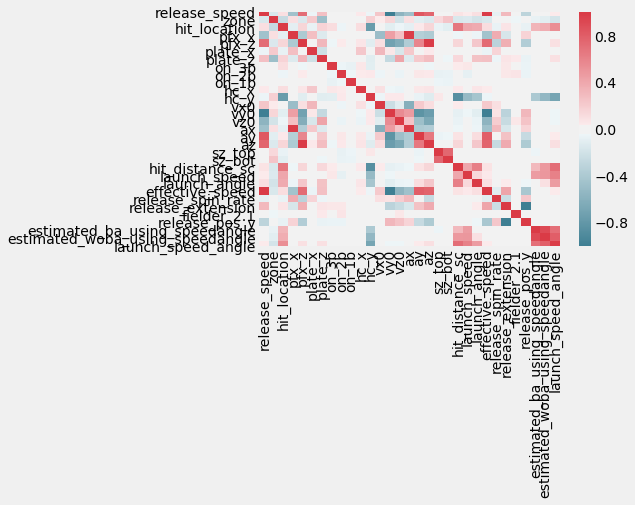

In [73]:
# correlation chart of Astros
corr = source_data.loc[:,Astros.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

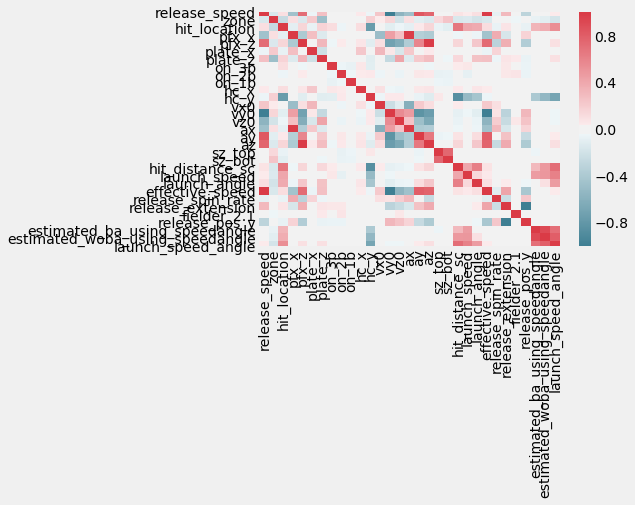

In [74]:
# correlation chart for League
corr = source_data.loc[:,League.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

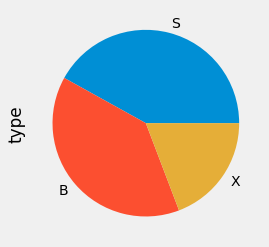

In [82]:
#source_data.plot.bar(x='description', rot=0)
Astros['type'].value_counts().plot(kind='pie', rot=90)

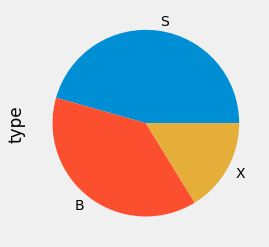

In [89]:
League['type'].value_counts().plot(kind='pie', rot=90)

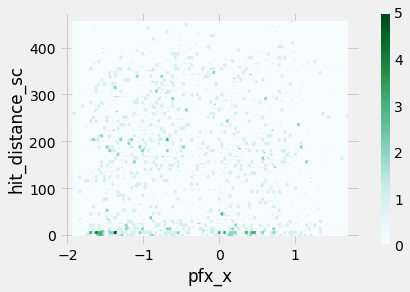

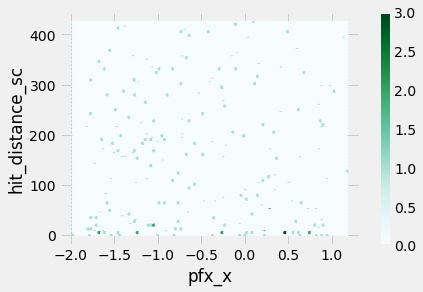

In [77]:
Astros.plot.hexbin(x='pfx_x', y='hit_distance_sc', gridsize=100)
League.plot.hexbin(x='pfx_x', y='hit_distance_sc', gridsize=100)

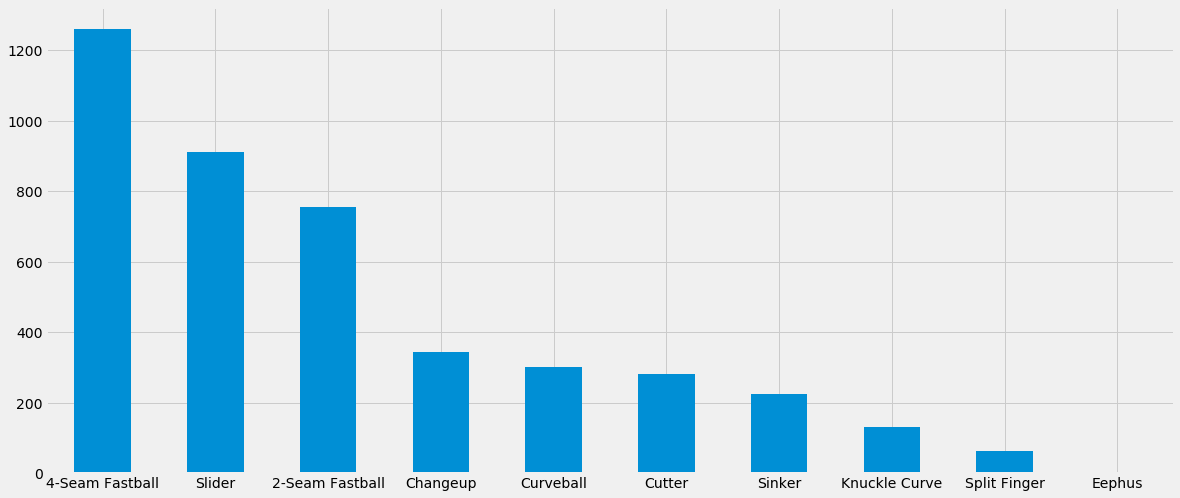

In [390]:
# plots & displays a distrubtion chart of given columns
Astros['pitch_name'].value_counts().plot(kind='bar', rot=0, figsize=(18,8))

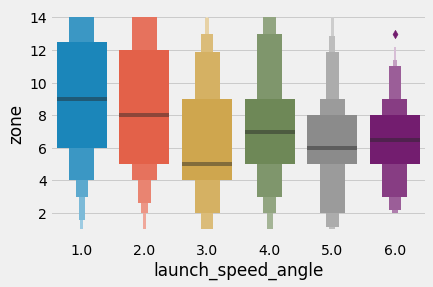

In [502]:
sns.boxenplot('launch_speed_angle', 'zone', data=Astros)

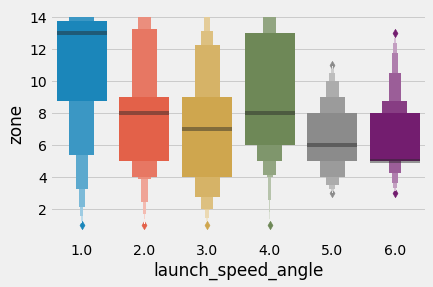

In [499]:
sns.boxenplot('launch_speed_angle', 'zone', data=League)

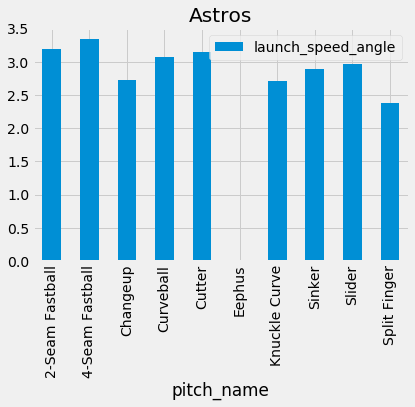

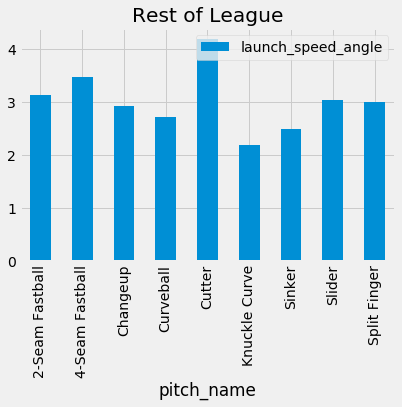

In [503]:
# plots & displays a distrubtion chart of given columns
Astros[['pitch_name', 'launch_speed_angle']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90, title='Astros')
League[['pitch_name', 'launch_speed_angle']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90, title='Rest of League')

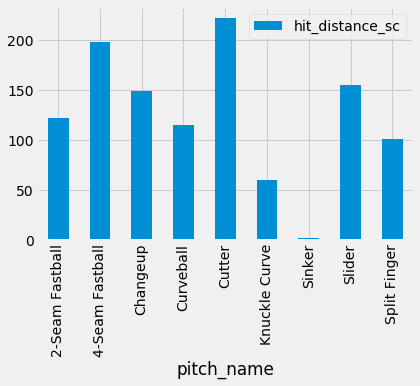

In [354]:
# plots & displays a distrubtion chart of given columns
League[['pitch_name', 'hit_distance_sc']].groupby(['pitch_name']).mean().plot(kind='bar', rot=90)

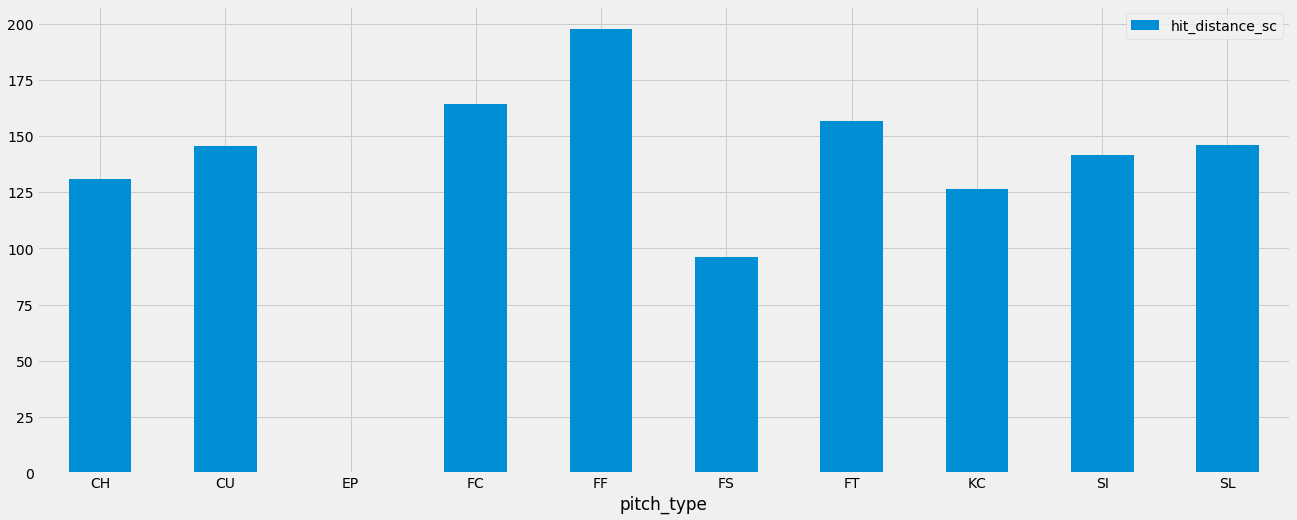

In [400]:
# sex vs. survived
Astros[['pitch_type', 'hit_distance_sc']].groupby(['pitch_type']).mean().plot(kind='bar', rot = 0, figsize=(20,8))

In [404]:
# # sex vs. survived
#source_data.groupby[['home_team', 'hit_distance_sc']].value_counts().plot(kind='bar', figsize=(18,8), rot=0)
Astros[['batter', 'hit_distance_sc']].groupby(['batter'].plot(kind='bar', rot = 0))

AttributeError: 'list' object has no attribute 'plot'

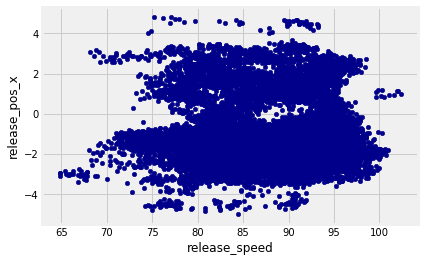

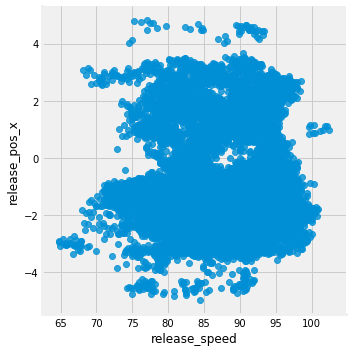

In [14]:
# scatter plot using seaborn
sns.lmplot('release_speed', 'release_pos_x', data=source_data, fit_reg=False)

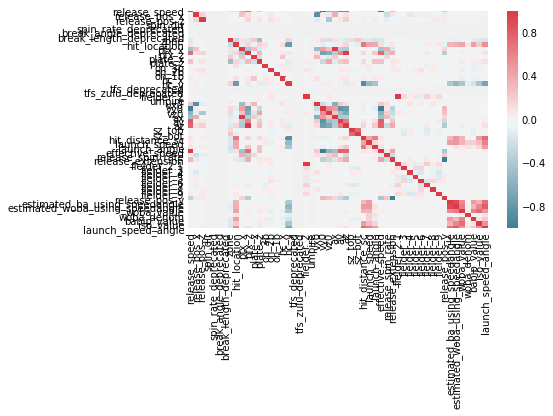

In [12]:
# correlation chart
corr = source_data.loc[:,source_data.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Research Answers
1. Did the Astros stealing signs have an effect of how they hit non-fastballs?
    - Yes, stealing signs helped the Astros hit non-fastballs. This is displayed through hex-graphs 1 and 2, which show the Astros vs Rest of League's hitting distance of pitches that were non-fastballs.
2. Which pitch zones were Silver Slugger and All Star caliber players hitting pitches from?
    - 
3. How often did Astros players swing at pitches outside of the strike zone?
    - 
4. How did Astros players perform on breaking / offspeed pitches compared players from other teams?
    - 
5. Other comparisons between Astros players and opposing players.
    - 